In [2]:
import matplotlib.pyplot as plt  
import seaborn as sns
import pandas as pd
import numpy as np
import random
import math

In [3]:
def smooth(y,w=7,o=1,d=5):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

In [28]:
alpha = '1.0'
demand_df = pd.read_csv('demand_{}_1_1.csv'.format(alpha))
supply_df = pd.read_csv('supply_{}_1_1.csv'.format(alpha))

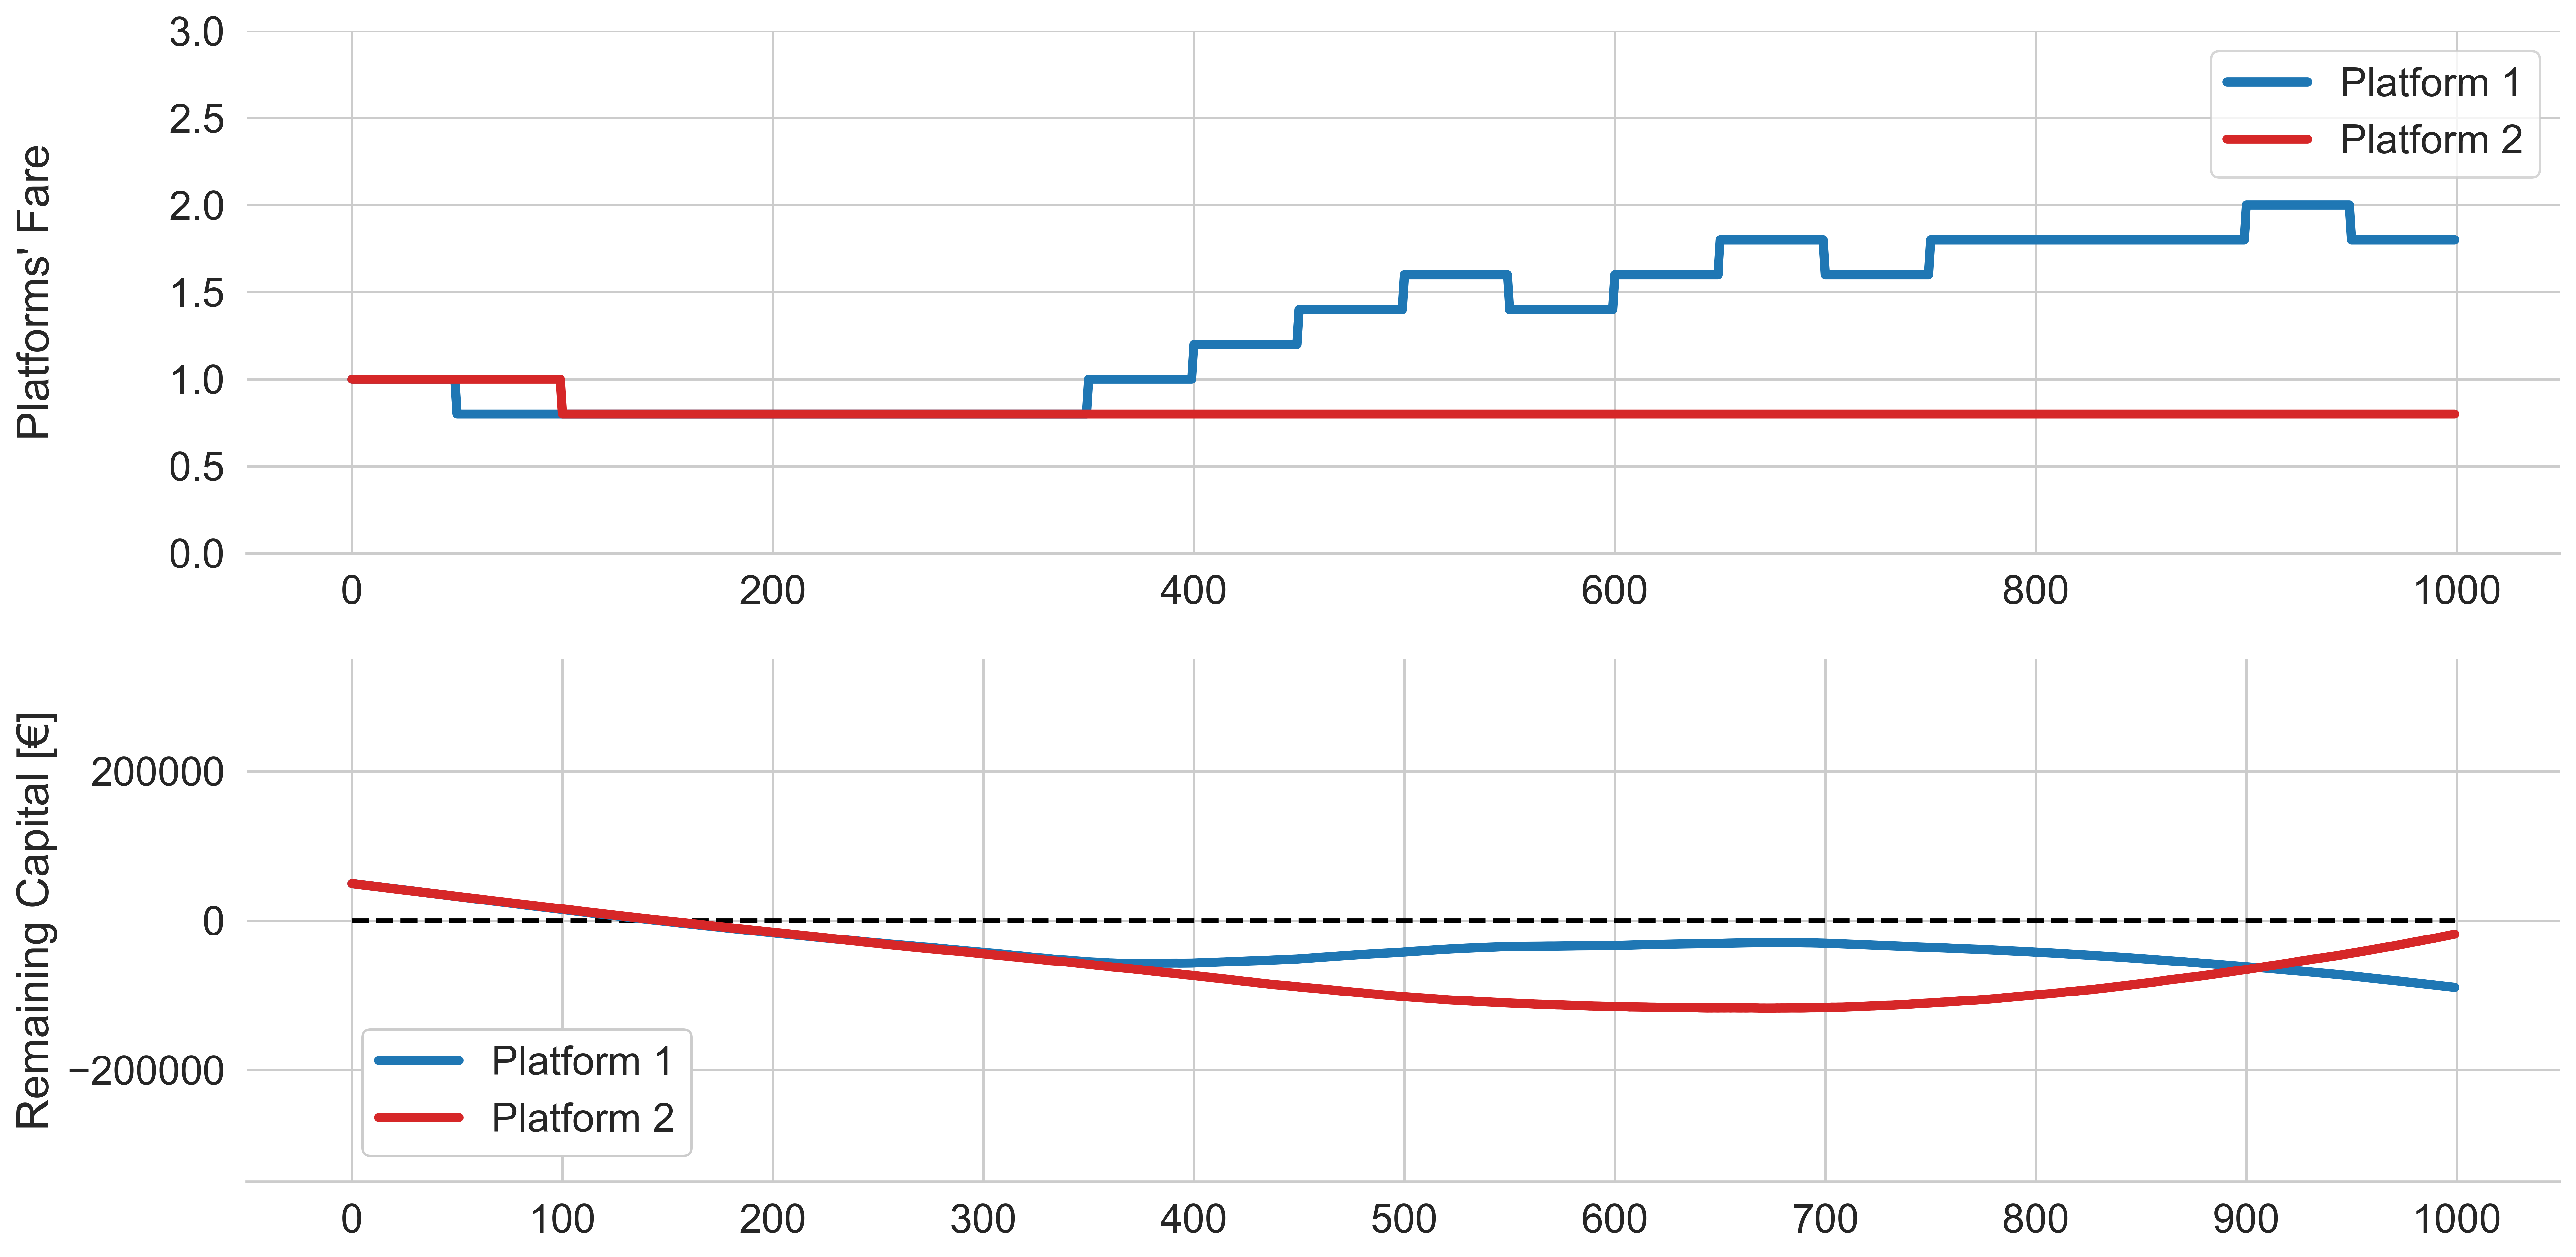

In [29]:
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C0'
c2 = 'C3'

sns.lineplot(x=demand_df.index, y=demand_df.P1_fare, label = 'Platform 1', color=c1, lw=4, ax=ax[0])
sns.lineplot(x=demand_df.index, y=demand_df.P2_fare, label = 'Platform 2', color=c2, lw=4, ax=ax[0])
ax[0].set(xlabel='', ylabel="Platforms' Fare", ylim = (0, 3))


sns.lineplot(x=demand_df.index, y=demand_df.P1_remaining_capital, label = 'Platform 1', color=c1, lw=4, ax=ax[1])
sns.lineplot(x=demand_df.index, y=demand_df.P2_remaining_capital, label = 'Platform 2', color=c2, lw=4, ax=ax[1])
ax[1].set(xlabel='', ylabel='Remaining Capital [€]', ylim = (-350000, 350000))
ax[1].legend(frameon=True,framealpha=1, loc=(0.05,0.05))

ax[1].hlines([0], 0, demand_df.index.max(), linestyles='dashed', colors='black', lw=2)

v_grid = np.arange(0, demand_df.index.max() + 2, 100)
ax[1].set_xticks(v_grid)

fig.align_ylabels()
plt.tight_layout()
plt.savefig('Figs_0.1/PF_RC_{}.png'.format(alpha))

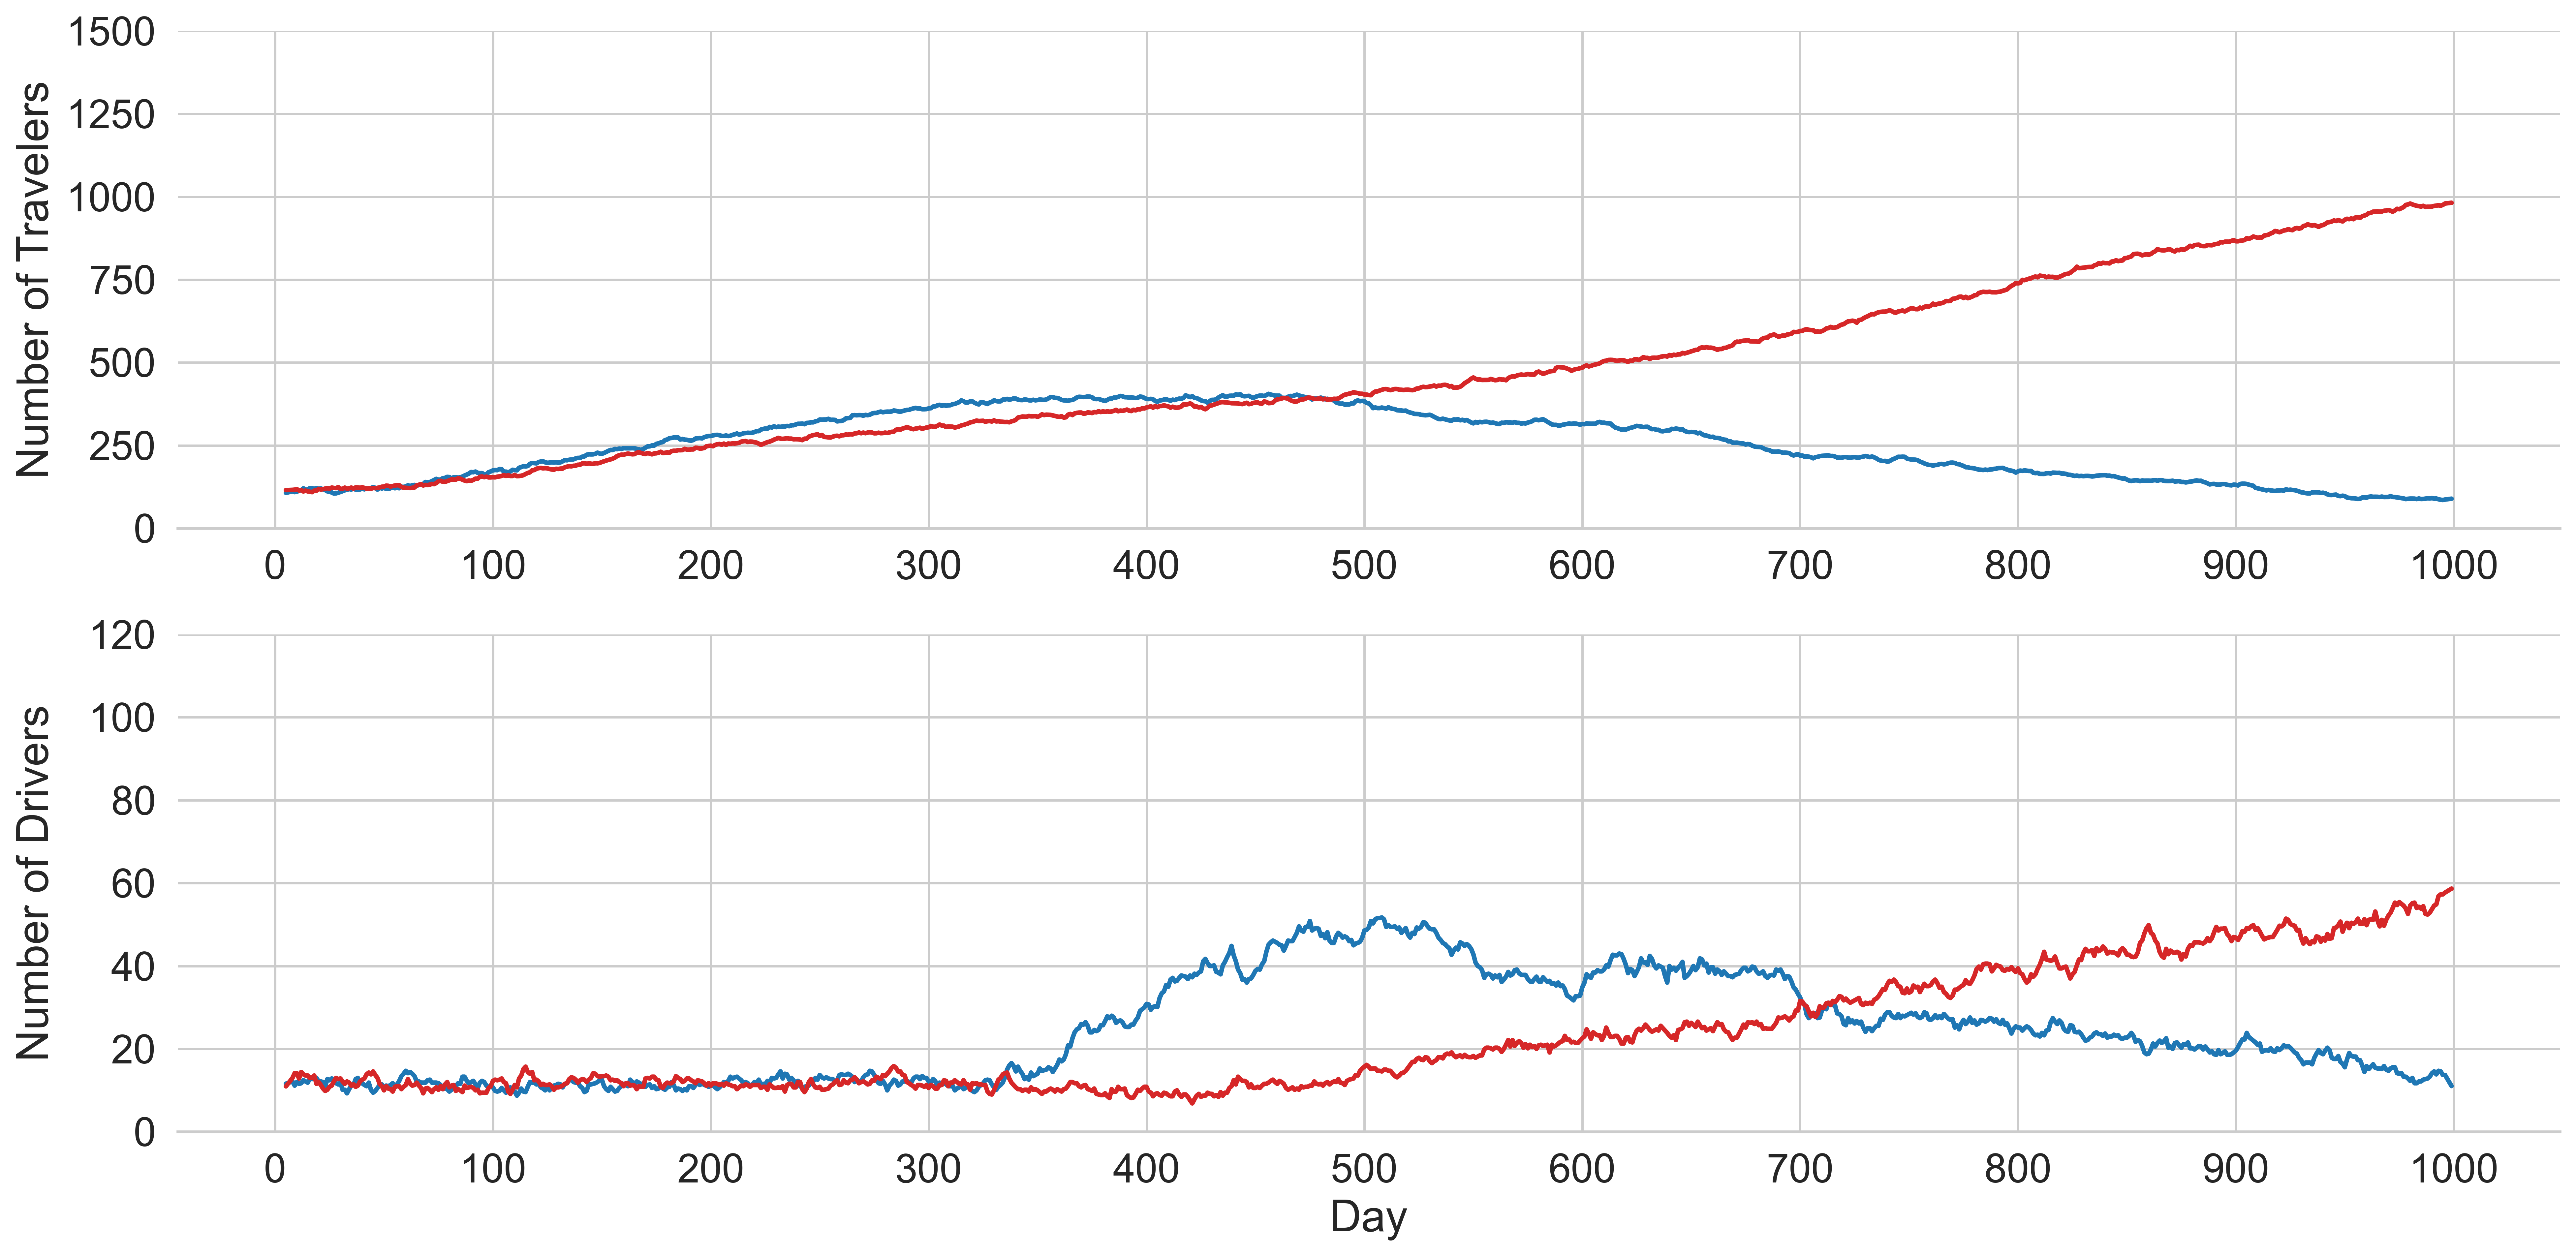

In [30]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C0'
c2 = 'C3'

sns.lineplot(x=demand_df.index, y=smooth(demand_df.P1_OUT), color=c1, lw=2, ax=ax[0])
sns.lineplot(x=demand_df.index, y=smooth(demand_df.P2_OUT), color=c2, lw=2, ax=ax[0])
ax[0].set(xlabel='', ylabel='Number of Travelers', ylim=(0,1500))

sns.lineplot(x=supply_df.index, y=smooth(supply_df.P1_OUT), color=c1, lw=2, ax=ax[1])
sns.lineplot(x=supply_df.index, y=smooth(supply_df.P2_OUT), color=c2, lw=2, ax=ax[1])
ax[1].set(xlabel='Day', ylabel='Number of Drivers', ylim=(0,120))

ax[0].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))
ax[1].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))

fig.align_ylabels()
plt.tight_layout()
plt.savefig('Figs_0.1/NP_NV_{}.png'.format(alpha))

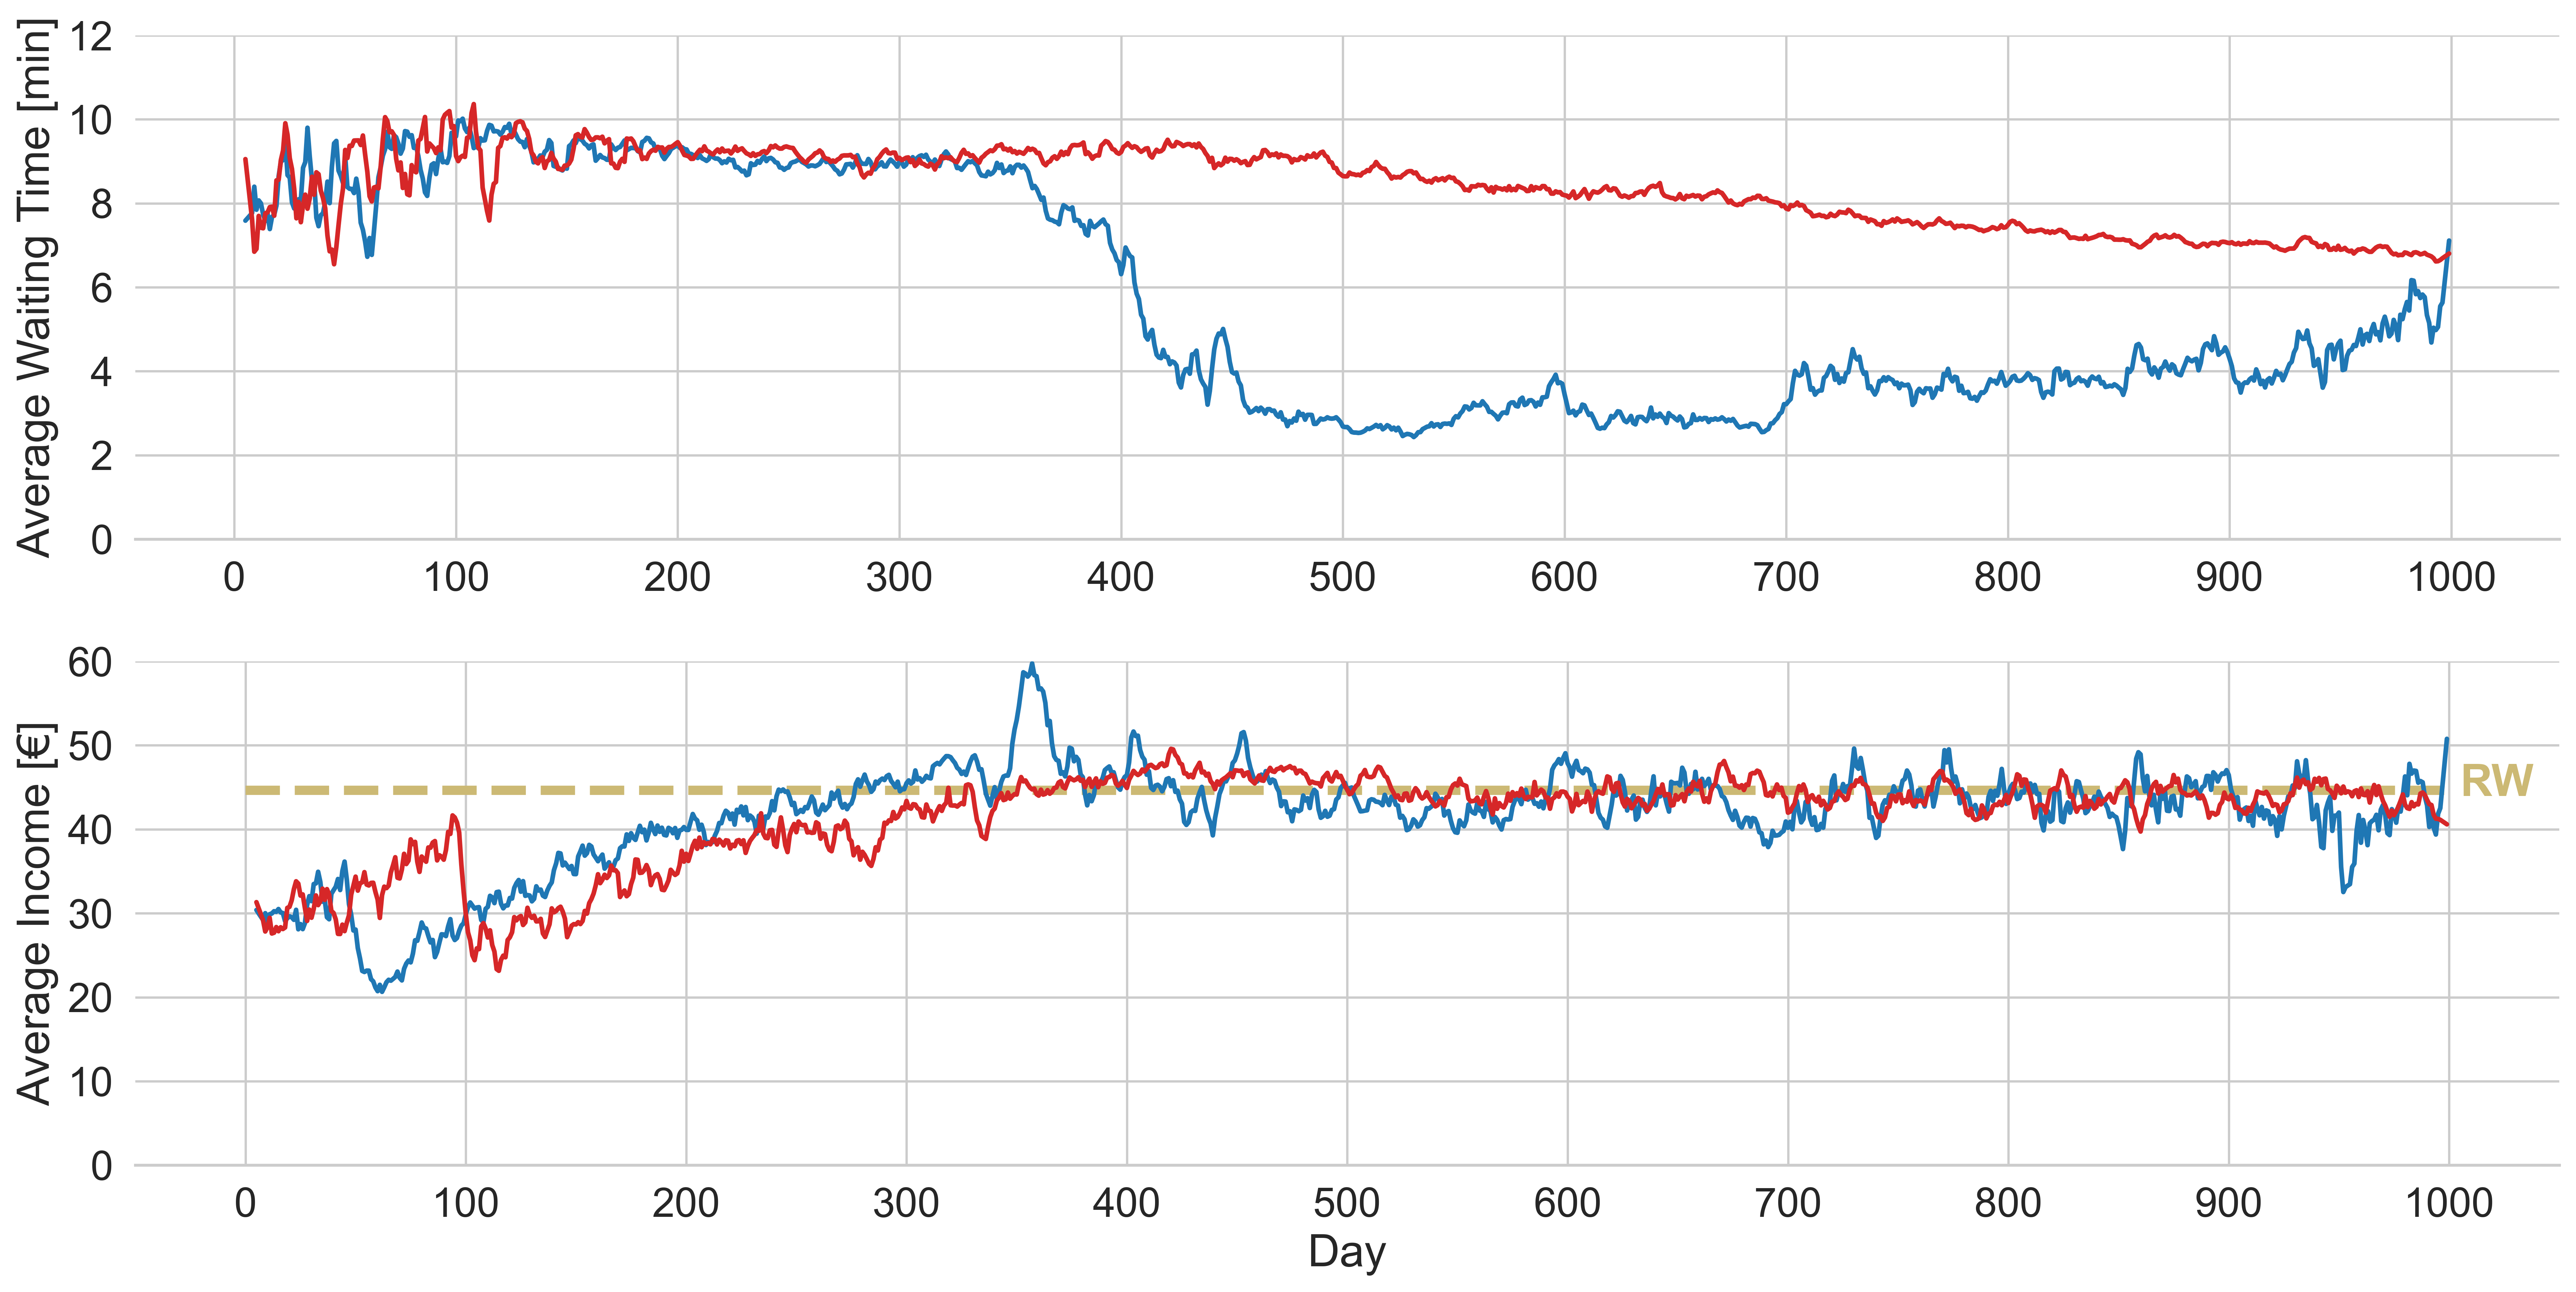

In [31]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C0'
c2 = 'C3'
RW = 4*11.16

sns.lineplot(x=demand_df.index, y=smooth(demand_df.P1_ACTUAL_WT), color=c1, lw=2, ax=ax[0])
sns.lineplot(x=demand_df.index, y=smooth(demand_df.P2_ACTUAL_WT), color=c2, lw=2, ax=ax[0])
ax[0].set(xlabel='', ylabel="Average Waiting Time [min]", ylim=(0,12))

sns.lineplot(x=supply_df.index, y=smooth(supply_df.P1_ACTUAL_INC), color=c1, lw=2, ax=ax[1])
sns.lineplot(x=supply_df.index, y=smooth(supply_df.P2_ACTUAL_INC), color=c2, lw=2, ax=ax[1])
ax[1].set(xlabel='Day', ylabel='Average Income [€]', ylim=(0,60))

ax[1].hlines([RW], 0, 1000, linestyles='dashed', colors='y', lw=4)
ax[1].annotate('RW', xy =(1005,44), fontweight='bold', color='y')    

ax[0].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))
ax[1].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))

fig.align_ylabels()
plt.tight_layout()
plt.savefig('Figs_0.1/AWT_AI_{}.png'.format(alpha))